# LGMVIP DATA SCIENCE INTERNSHIP

## Task 2 : Stock Market Prediction And Forecasting Using Stacked LSTM

### Import The Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = "https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv"
train_data = pd.read_csv(data)
training_set = train_data.iloc[:, 1:2].values

In [3]:
train_data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [4]:
close_data = train_data['Close']

In [5]:
close_data

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

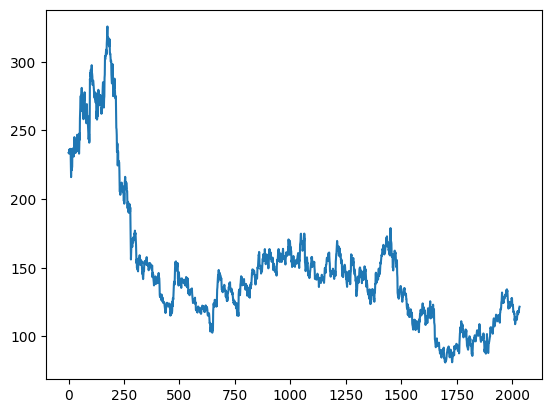

In [6]:
plt.plot(close_data)

#### Since LSTM are sensitive to the scale data, we apply MinMax transformation to transform our values betn 0 and 1

## Data Normalization

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
close_data = scaler.fit_transform(np.array(close_data).reshape(-1,1))

In [8]:
close_data.shape

(2035, 1)

In [9]:
print(close_data)

[[0.62418301]
 [0.62214052]
 [0.62622549]
 ...
 [0.1621732 ]
 [0.16319444]
 [0.16584967]]


## Train Test Split

In [10]:
training_size = int(len(close_data)*0.75)
test_size = len(close_data) - training_size
train_data, test_data = close_data[0:training_size,:], close_data[training_size:len(close_data),:1]

In [11]:
def create_data(data, time_step=1):
    dataX,dataY = [],[]
    for i in range(len(data) - time_step - 1):
        a = data[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(data[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

In [12]:
time_step = 100
x_train,y_train = create_data(train_data,time_step)
x_test, y_test = create_data(test_data,time_step)

## Reshape the inputs to be

In [13]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1],1)

## Model Building  

In [14]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.fit(x_train,y_train, validation_data=(x_test, y_test),epochs=100, batch_size = 64, verbose = 1)

Epoch 1/100
23/23 [==============================] - 8s 172ms/step - loss: 0.0230 - val_loss: 0.0055
Epoch 2/100
23/23 [==============================] - 3s 111ms/step - loss: 0.0026 - val_loss: 0.0010
Epoch 3/100
23/23 [==============================] - 3s 139ms/step - loss: 0.0017 - val_loss: 0.0016
Epoch 4/100
23/23 [==============================] - 3s 124ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 5/100
23/23 [==============================] - 3s 152ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 6/100
23/23 [==============================] - 3s 114ms/step - loss: 0.0013 - val_loss: 0.0016
Epoch 7/100
23/23 [==============================] - 3s 132ms/step - loss: 0.0012 - val_loss: 0.0015
Epoch 8/100
23/23 [==============================] - 4s 155ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 9/100
23/23 [==============================] - 3s 131ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 10/100
23/23 [==============================] - 4s 168ms/step - loss: 0.0011 - val_lo

In [17]:
# Predicting the models
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

13/13 [==============================] - 0s 20ms/step


In [18]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [19]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_test, test_predict))

105.65718273404472

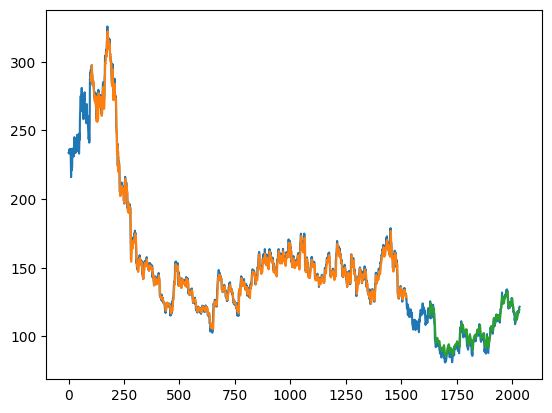

In [20]:
#Plotting the graphs

#shift train prediction for plotting

look_back = 100
train_predict_plot = np.empty_like(close_data)
train_predict_plot[:,:] = np.nan
train_predict_plot[look_back:len(train_predict)+look_back, :] = train_predict

# shift the test results for plotting
test_predict_plot = np.empty_like(close_data)
test_predict_plot[:,:] = np.nan
test_predict_plot[len(train_predict) + (look_back * 2)+1:len(close_data)-1 :] = test_predict

#plot baseline and predictions
plt.plot(scaler.inverse_transform(close_data))
plt.plot(train_predict_plot)
plt.plot(test_predict_plot)
plt.show()


## Stock prediction for next 30 days

In [21]:
len(test_data), x_test.shape

(509, (408, 100, 1))

In [22]:
x_input = test_data[409:].reshape(1,-1)
x_input.shape

(1, 100)

In [23]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [24]:
lst_output = []
n_step = 100
next_Number_Of_Days = 30
temp_input = [] # Add this to initialize temp_input
i = 0

while(i<next_Number_Of_Days):
    
    if(len(temp_input)>100):
        x_input = np.array(temp_input[1:])
        print("{} day input {} ".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_step, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {} ".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
    else:
        x_input = np.zeros((1,n_step,1)) # Modify this line to initialize x_input
        yhat = model.predict(x_input,verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i = i+1 
print("lst_output")

[0.01602147]
1
[0.01602147]
2
[0.01602147]
3
[0.01602147]
4
[0.01602147]
5
[0.01602147]
6
[0.01602147]
7
[0.01602147]
8
[0.01602147]
9
[0.01602147]
10
[0.01602147]
11
[0.01602147]
12
[0.01602147]
13
[0.01602147]
14
[0.01602147]
15
[0.01602147]
16
[0.01602147]
17
[0.01602147]
18
[0.01602147]
19
[0.01602147]
20
[0.01602147]
21
[0.01602147]
22
[0.01602147]
23
[0.01602147]
24
[0.01602147]
25
[0.01602147]
26
[0.01602147]
27
[0.01602147]
28
[0.01602147]
29
[0.01602147]
30
lst_output


In [25]:
day_new = np.arange(1,101)
day_predict = np.arange(101,131)

In [26]:
df = close_data.tolist()
df.extend(lst_output)

In [27]:
len(close_data)

2035

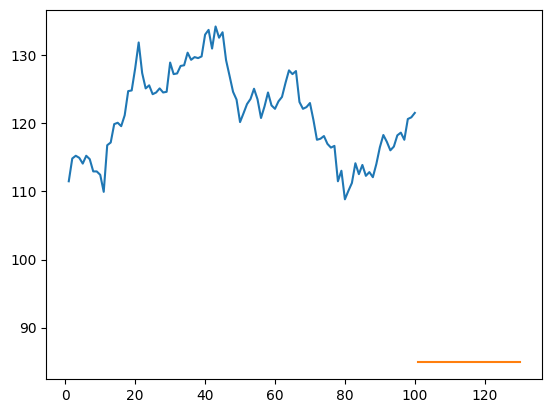

In [28]:
plt.plot(day_new, scaler.inverse_transform(close_data[1935:]))
plt.plot(day_predict, scaler.inverse_transform(lst_output))